#Data Preprocessing:
- Clean and preprocess the dataset, handling any missing values or outliers.
- Combine the date and time columns into a datetime format for effective time series analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/household_power_consumption.txt'
data = pd.read_csv(file_path, sep=';', low_memory=False)

# Combine 'Date' and 'Time' columns into a single 'datetime' column
data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S')

# Drop the original 'Date' and 'Time' columns
data.drop(['Date', 'Time'], axis=1, inplace=True)

# Convert all other columns to numeric, forcing errors to NaN
for col in data.columns:
    if col != 'datetime':
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Handle missing values by filling them with the mean of the column
data.fillna(data.mean(), inplace=True)

# Set 'datetime' as the index
data.set_index('datetime', inplace=True)

# Detect and handle outliers by capping them at 1.5*IQR
for col in data.columns:
    if col != 'datetime':
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
        data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])

# Display the first few rows of the cleaned data
print(data.head())


                     Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-16 17:24:00                3.335                  0.408   234.84   
2006-12-16 17:25:00                3.335                  0.408   233.63   
2006-12-16 17:26:00                3.335                  0.408   233.29   
2006-12-16 17:27:00                3.335                  0.408   233.74   
2006-12-16 17:28:00                3.335                  0.408   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
datetime                                                                
2006-12-16 17:24:00              13.9             0.0             1.0   
2006-12-16 17:25:00              13.9             0.0             1.0   
2006-12-16 17:26:00              13.9             0.0             2.0   
2006-12-16 17:27:00              13.9             0.0             1.0   
2006-12-16 17:28:00          

In [2]:
data.head()

Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-16 17:24:00                3.335                  0.408   234.84   
2006-12-16 17:25:00                3.335                  0.408   233.63   
2006-12-16 17:26:00                3.335                  0.408   233.29   
2006-12-16 17:27:00                3.335                  0.408   233.74   
2006-12-16 17:28:00                3.335                  0.408   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
datetime                                                                
2006-12-16 17:24:00              13.9             0.0             1.0   
2006-12-16 17:25:00              13.9             0.0             1.0   
2006-12-16 17:26:00              13.9             0.0             2.0   
2006-12-16 17:27:00              13.9             0.0             1.0   
2006-12-16 17:28:00              13.9             0.0             1.0   

                     Sub_metering_3  
datetime                             
2006-12-16 17:24:00            17.0  
2006-12-16 17:25:00            16.0  
2006-12-16 17:26:00            17.0  
2006-12-16 17:27:00            17.0  
2006-12-16 17:28:00            17.0

#Exploratory Data Analysis (EDA):
- Conduct EDA to uncover patterns, trends, and seasonality in electricity consumption.
- Visualize the relationships between different features to gain insights.

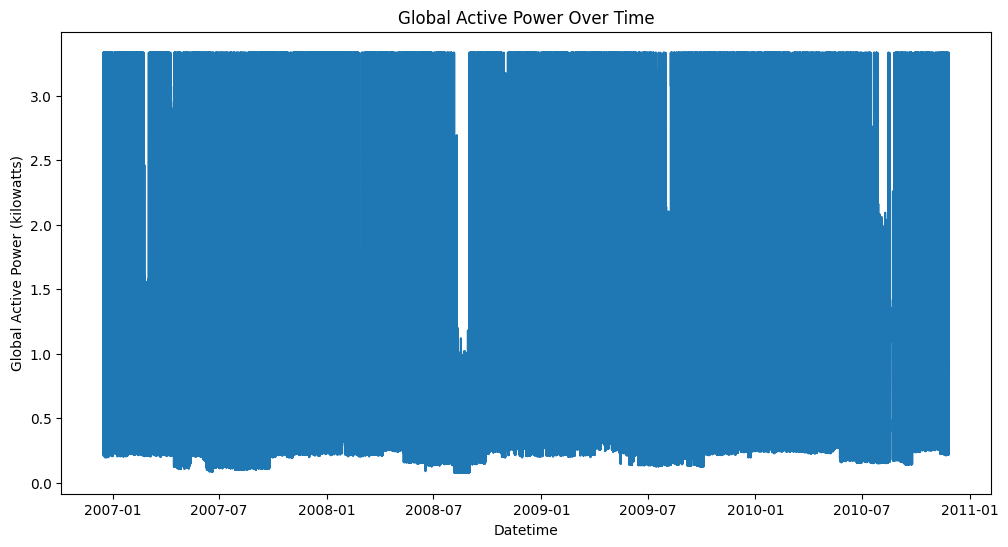

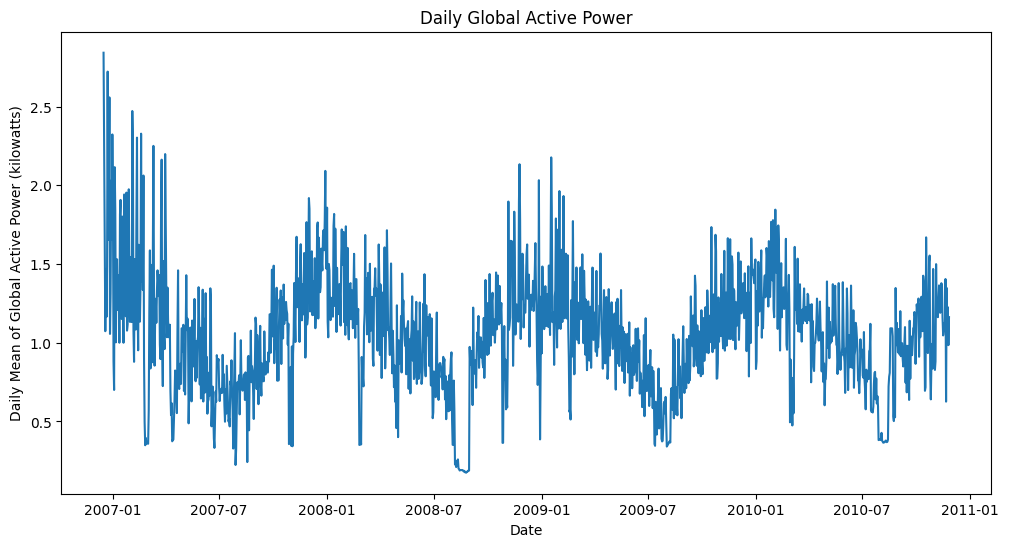

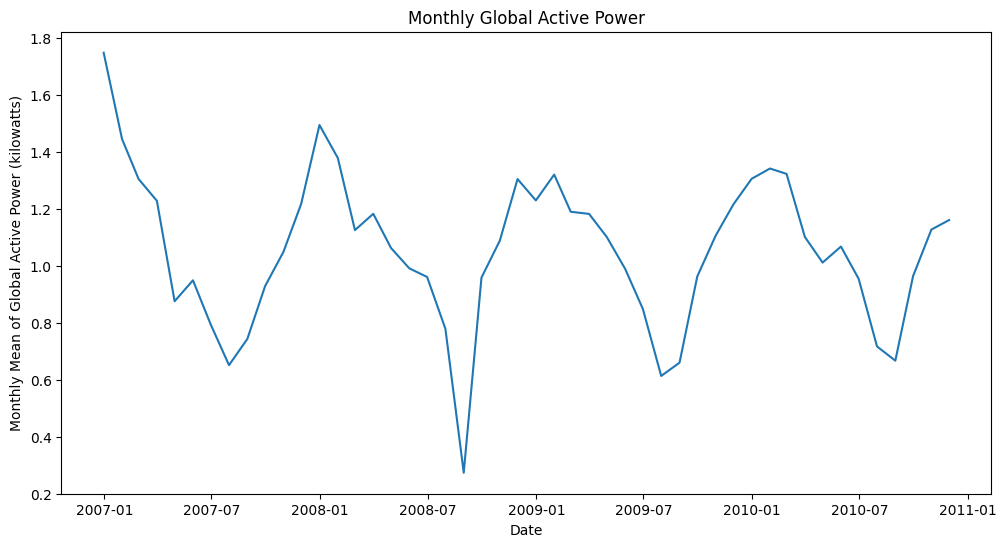

In [3]:
# Plot Global_active_power over time
plt.figure(figsize=(12, 6))
plt.plot(data['Global_active_power'])
plt.title('Global Active Power Over Time')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power (kilowatts)')
plt.show()

# Resample the data to daily mean
daily_data = data.resample('D').mean()

# Plot daily Global_active_power
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Global_active_power'])
plt.title('Daily Global Active Power')
plt.xlabel('Date')
plt.ylabel('Daily Mean of Global Active Power (kilowatts)')
plt.show()

# Resample the data to monthly mean
monthly_data = data.resample('M').mean()

# Plot monthly Global_active_power
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Global_active_power'])
plt.title('Monthly Global Active Power')
plt.xlabel('Date')
plt.ylabel('Monthly Mean of Global Active Power (kilowatts)')
plt.show()


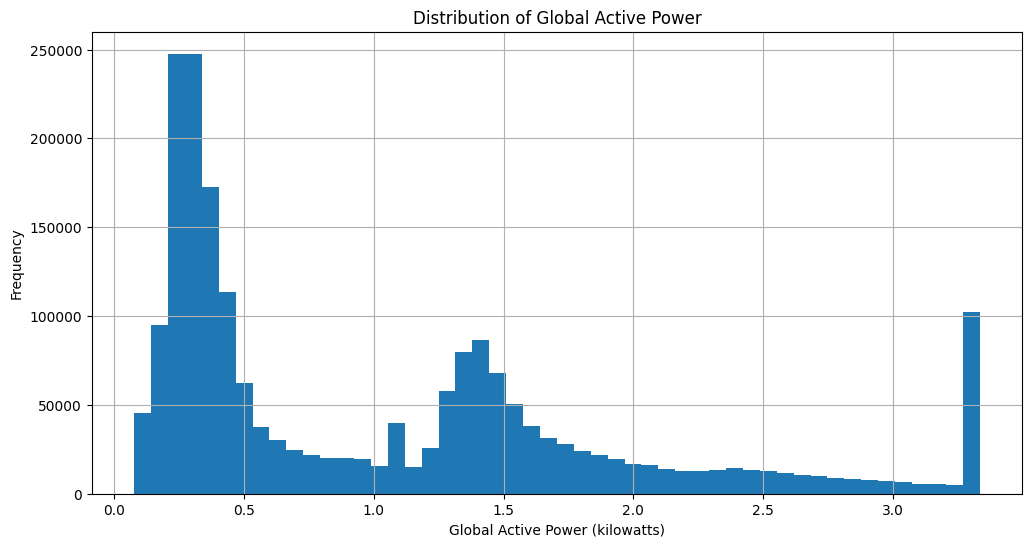

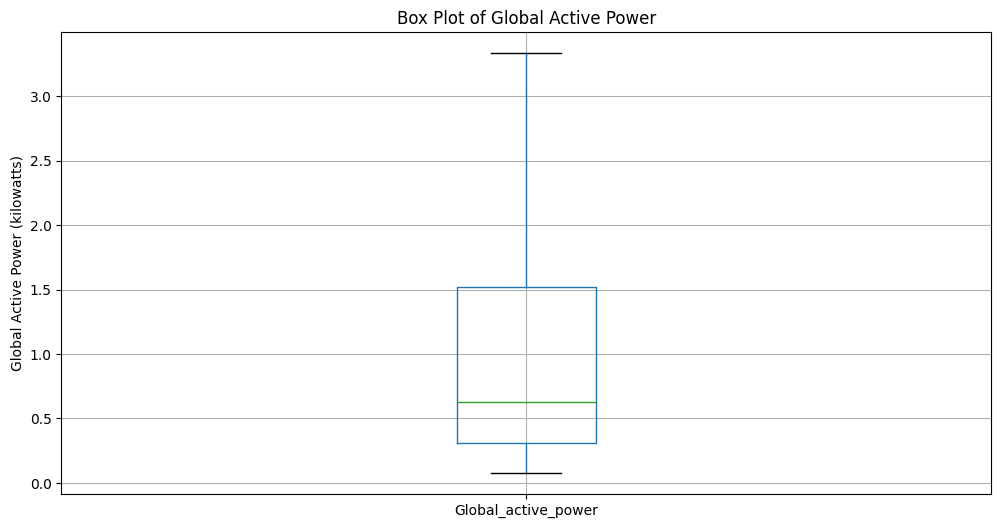

In [4]:
# Histogram of Global_active_power
plt.figure(figsize=(12, 6))
data['Global_active_power'].hist(bins=50)
plt.title('Distribution of Global Active Power')
plt.xlabel('Global Active Power (kilowatts)')
plt.ylabel('Frequency')
plt.show()

# Box plot of Global_active_power
plt.figure(figsize=(12, 6))
data.boxplot(column='Global_active_power')
plt.title('Box Plot of Global Active Power')
plt.ylabel('Global Active Power (kilowatts)')
plt.show()

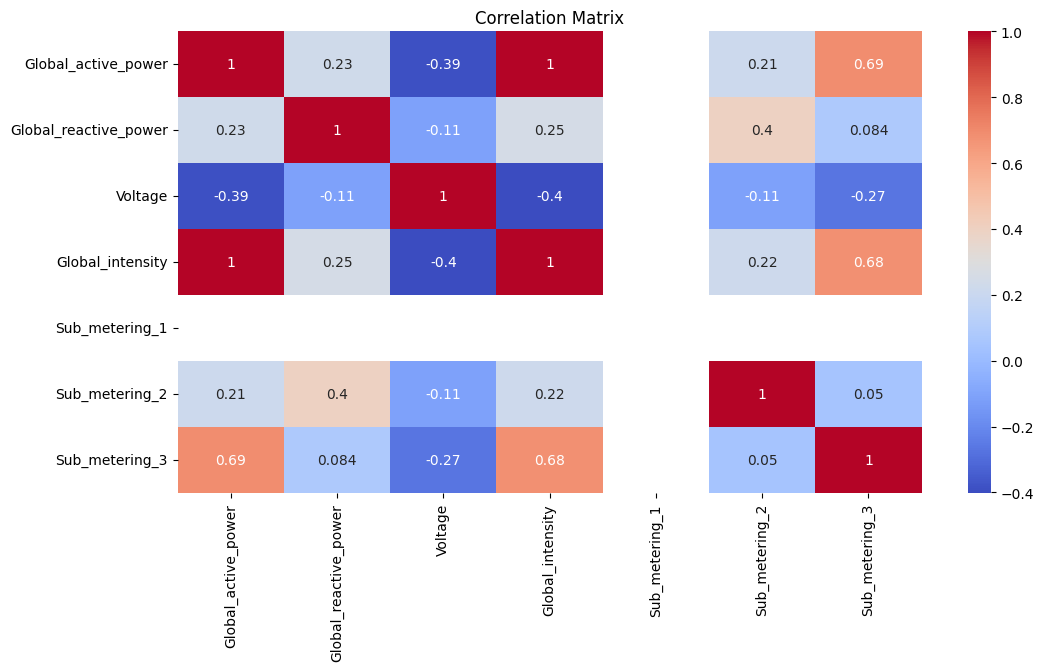

In [5]:
# Plot the correlation matrix
plt.figure(figsize=(12, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

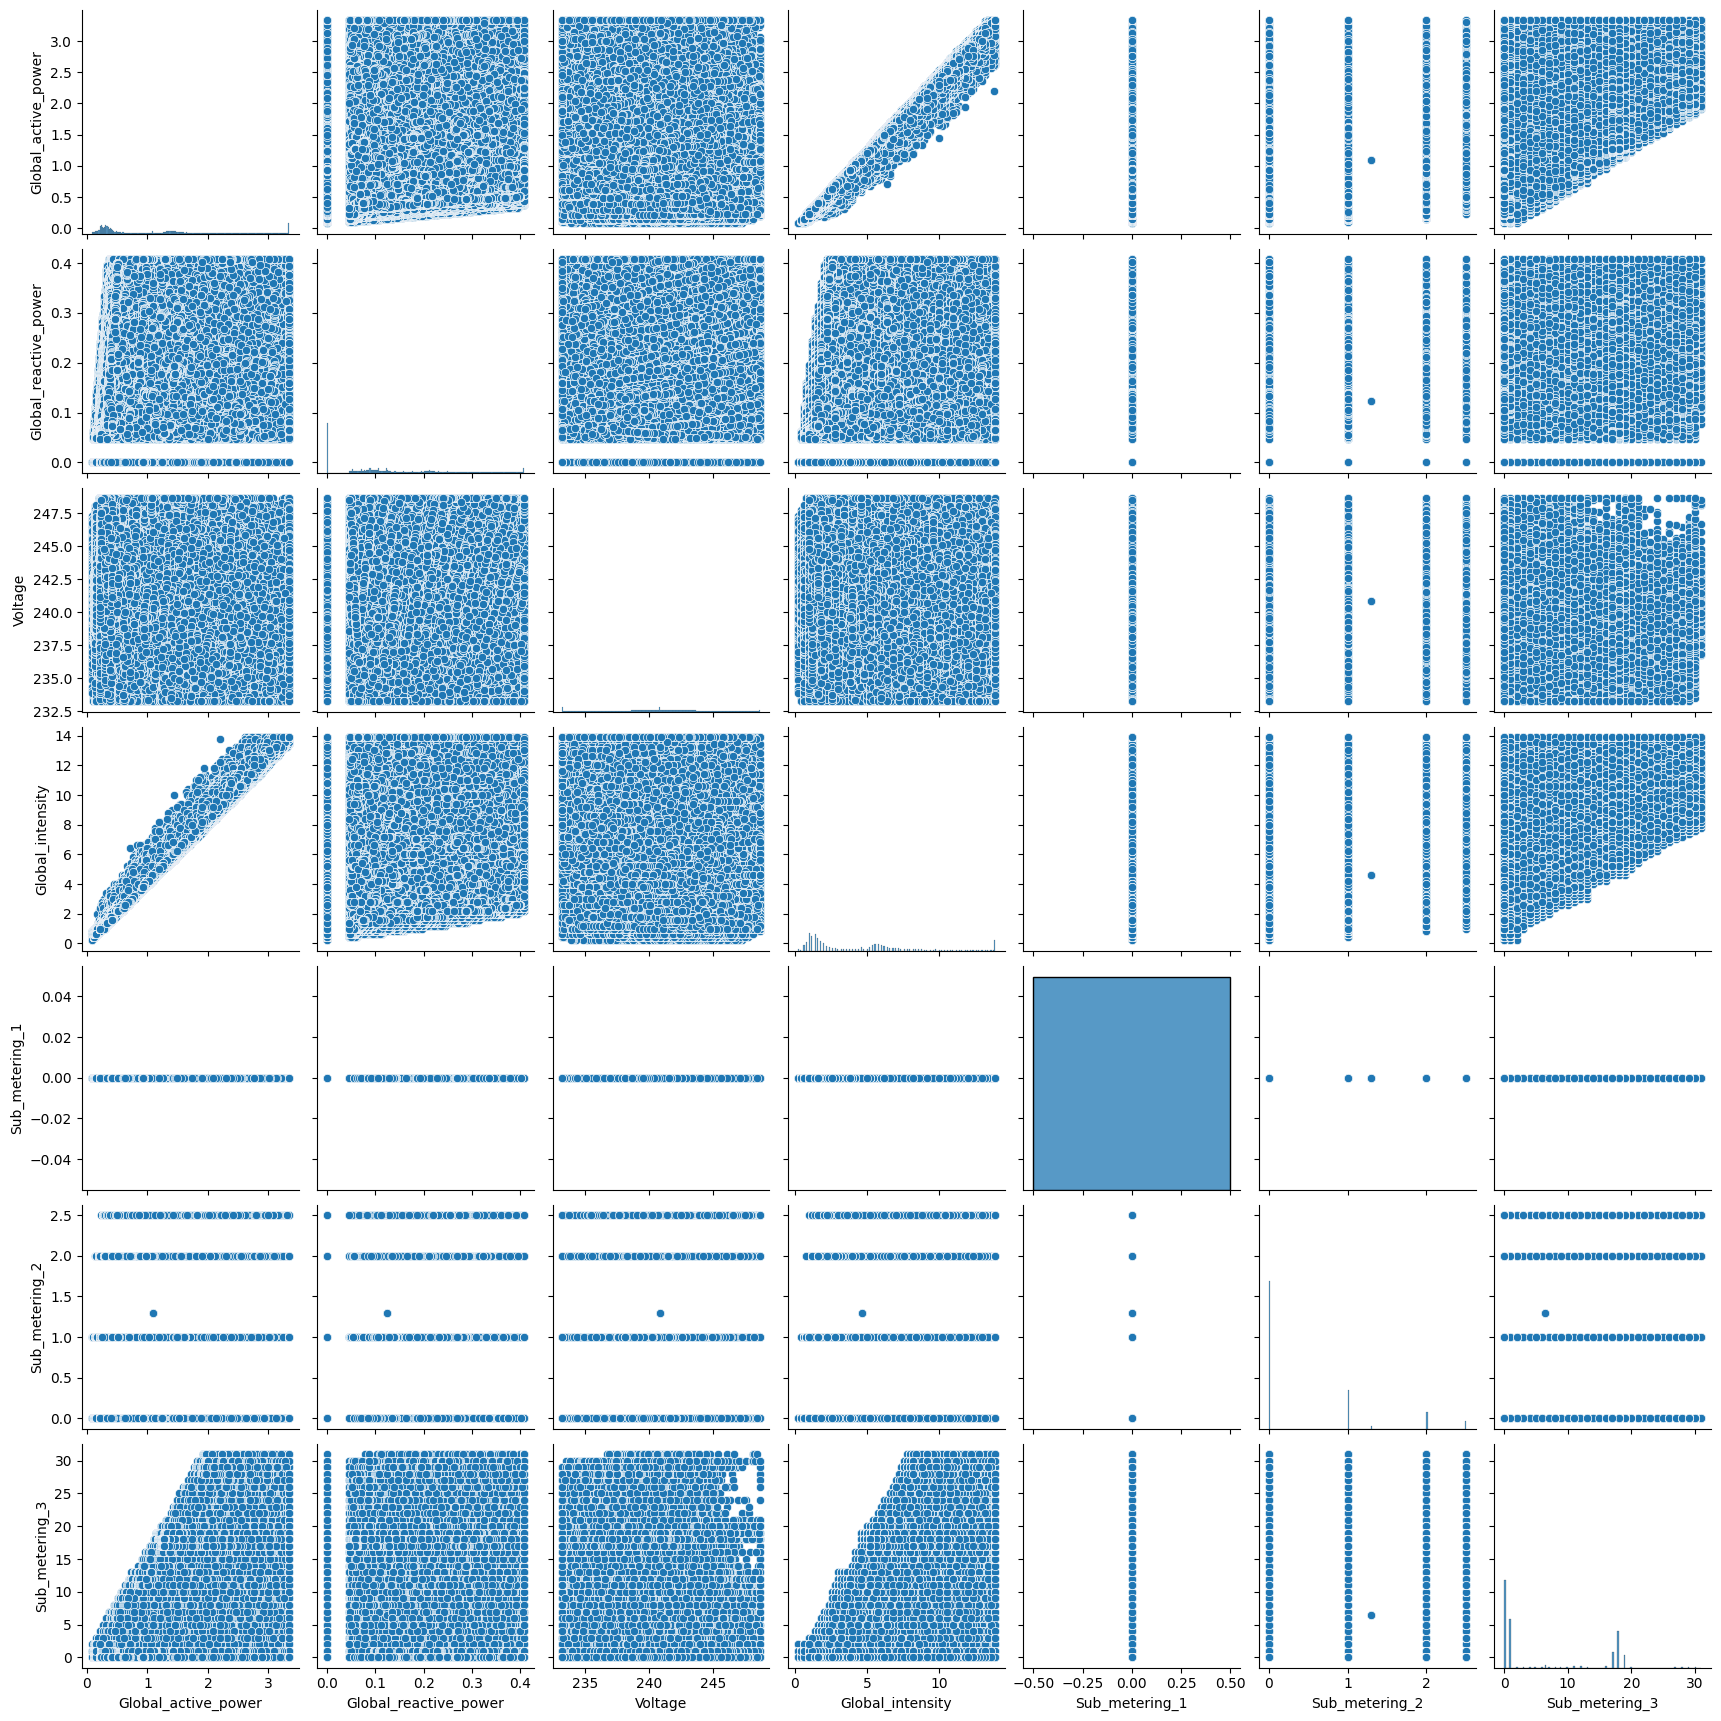

In [6]:
# Pairplot to visualize relationships between different features
sns.pairplot(data)
plt.show()

# Time Series Forecasting Models
- Implement time series forecasting models such as ARIMA, SARIMA, or LSTM.
- Evaluate the performance of the models using appropriate metrics.

In [7]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

ARIMA Model Mean Squared Error: 0.31817672802485303


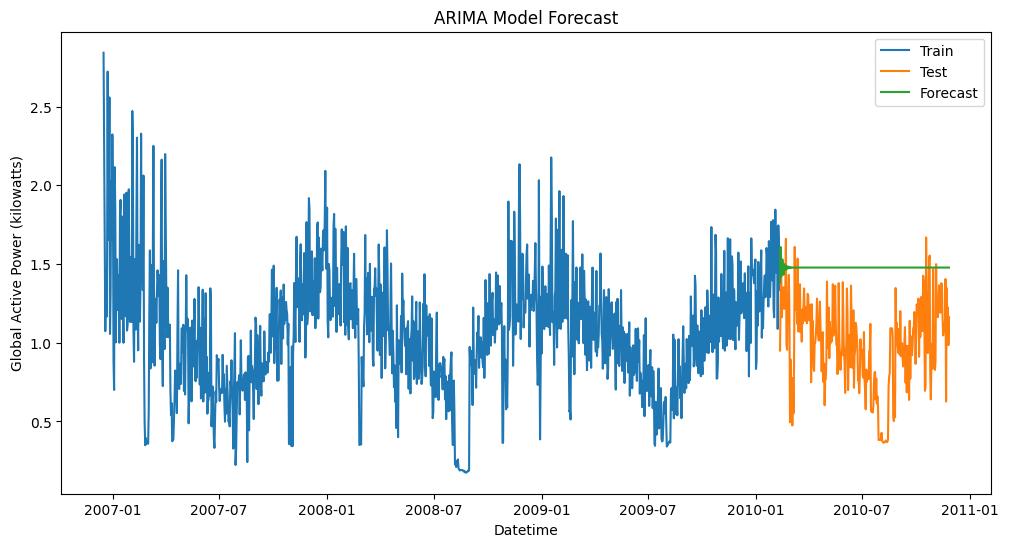

In [8]:
# Resample the data to daily mean
data = data[['Global_active_power']].resample('D').mean()
data.fillna(data.mean(), inplace=True)

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Fit the ARIMA model
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Evaluate the model
mse = mean_squared_error(test, forecast)
print(f'ARIMA Model Mean Squared Error: {mse}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.title('ARIMA Model Forecast')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power (kilowatts)')
plt.show()

SARIMA Model Mean Squared Error: 0.34519292613182917


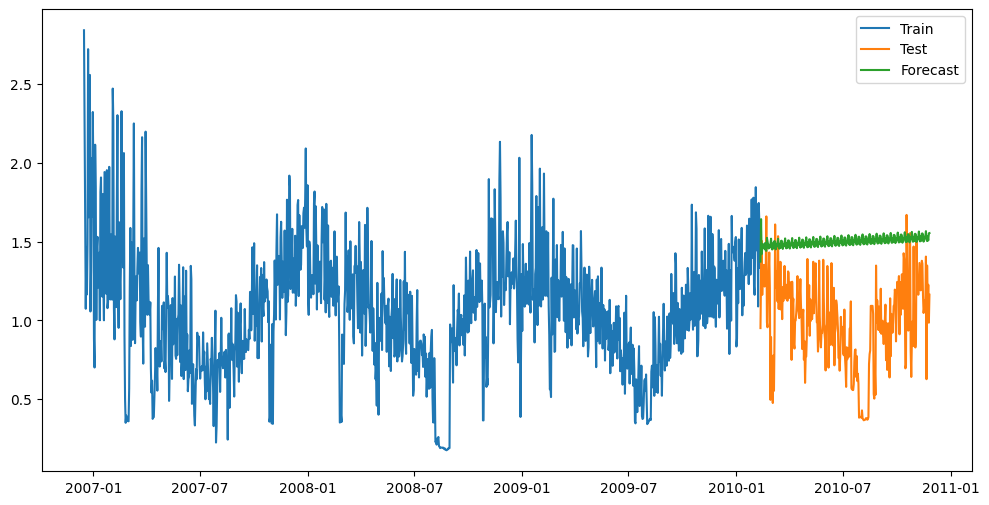

In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model
model = SARIMAX(train, order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Evaluate the model
mse = mean_squared_error(test, forecast)
print(f'SARIMA Model Mean Squared Error: {mse}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Prepare the data for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10
X, Y = create_dataset(scaled_data, time_step)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, batch_size=1, epochs=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

# Evaluate the model
mse = mean_squared_error(Y_test[0], test_predict[:,0])
print(f'LSTM Model Mean Squared Error: {mse}')



9/9 [==============================] - 0s 4ms/step
LSTM Model Mean Squared Error: 0.05515892930028329


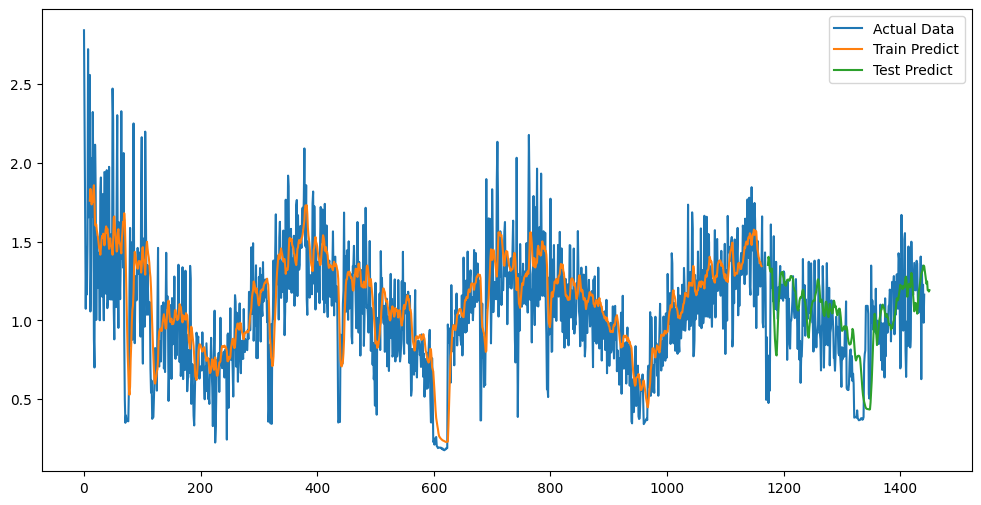

In [11]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(scaled_data), label='Actual Data')
plt.plot(np.arange(time_step, len(train_predict) + time_step), train_predict, label='Train Predict')
plt.plot(np.arange(len(train_predict) + (time_step * 2), len(train_predict) + (time_step * 2) + len(test_predict)), test_predict, label='Test Predict')
plt.legend()
plt.show()

# Feature Engineering
- Investigate the impact of various features on electricity consumption.
- Explore the creation of new features that might enhance prediction accuracy.

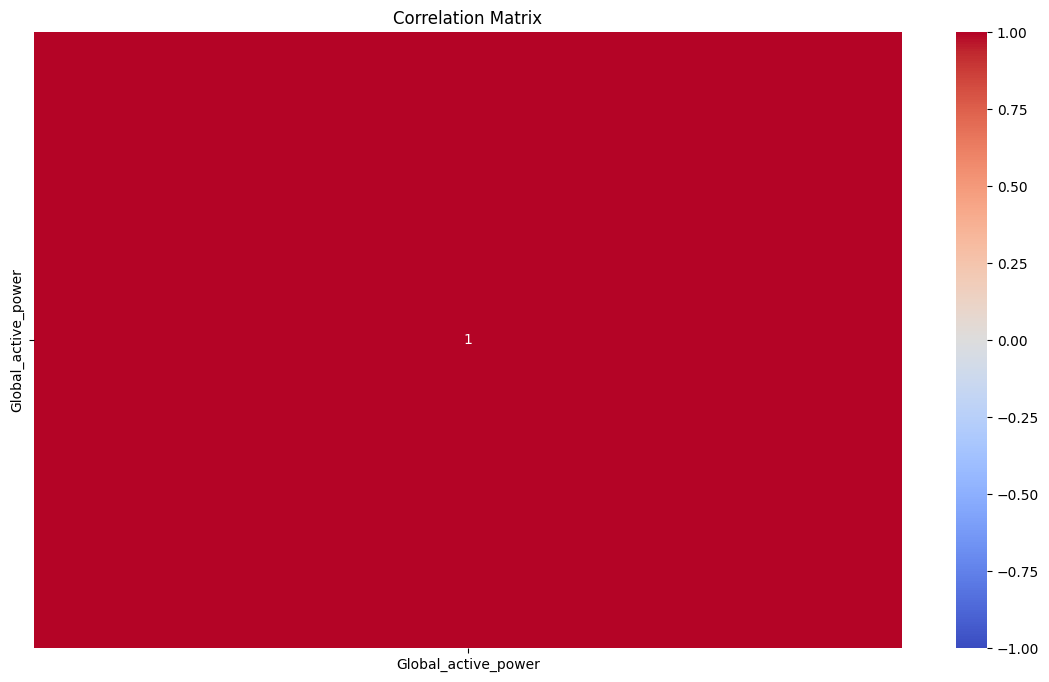

In [12]:
# Plot the correlation matrix
plt.figure(figsize=(14, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()


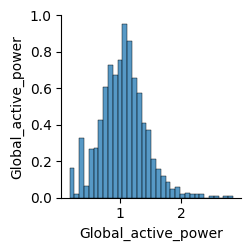

In [13]:
# Pairplot to visualize relationships between different features
sns.pairplot(data)
plt.show()

In [14]:
# Plot each feature against Global_active_power
for column in data.columns:
    if column != 'Global_active_power':
        plt.figure(figsize=(12, 6))
        plt.scatter(data[column], data['Global_active_power'])
        plt.title(f'Global Active Power vs {column}')
        plt.xlabel(column)
        plt.ylabel('Global Active Power (kilowatts)')
        plt.show()


In [15]:
# Create time-based features
data['day'] = data.index.day
data['month'] = data.index.month
data['year'] = data.index.year
data['dayofweek'] = data.index.dayofweek
data['weekofyear'] = data.index.isocalendar().week


In [16]:
# Create rolling statistics features
data['rolling_mean_7'] = data['Global_active_power'].rolling(window=7).mean()
data['rolling_std_7'] = data['Global_active_power'].rolling(window=7).std()
data['rolling_mean_30'] = data['Global_active_power'].rolling(window=30).mean()
data['rolling_std_30'] = data['Global_active_power'].rolling(window=30).std()


In [17]:
# Create lag features
data['lag_1'] = data['Global_active_power'].shift(1)
data['lag_7'] = data['Global_active_power'].shift(7)
data['lag_30'] = data['Global_active_power'].shift(30)


In [18]:
# Drop rows with NaN values created by rolling and lag features
data.dropna(inplace=True)

# Display the first few rows of the dataset with new features
print(data.head())


            Global_active_power  day  month  year  dayofweek  weekofyear  \
datetime                                                                   
2007-01-15             1.462487   15      1  2007          0           3   
2007-01-16             1.150833   16      1  2007          1           3   
2007-01-17             1.801640   17      1  2007          2           3   
2007-01-18             1.241306   18      1  2007          3           3   
2007-01-19             0.999873   19      1  2007          4           3   

            rolling_mean_7  rolling_std_7  rolling_mean_30  rolling_std_30  \
datetime                                                                     
2007-01-15        1.463486       0.317384         1.587095        0.492359   
2007-01-16        1.455303       0.325696         1.551610        0.483803   
2007-01-17        1.509719       0.349879         1.561715        0.485817   
2007-01-18        1.482804       0.364020         1.567317        0.480935   

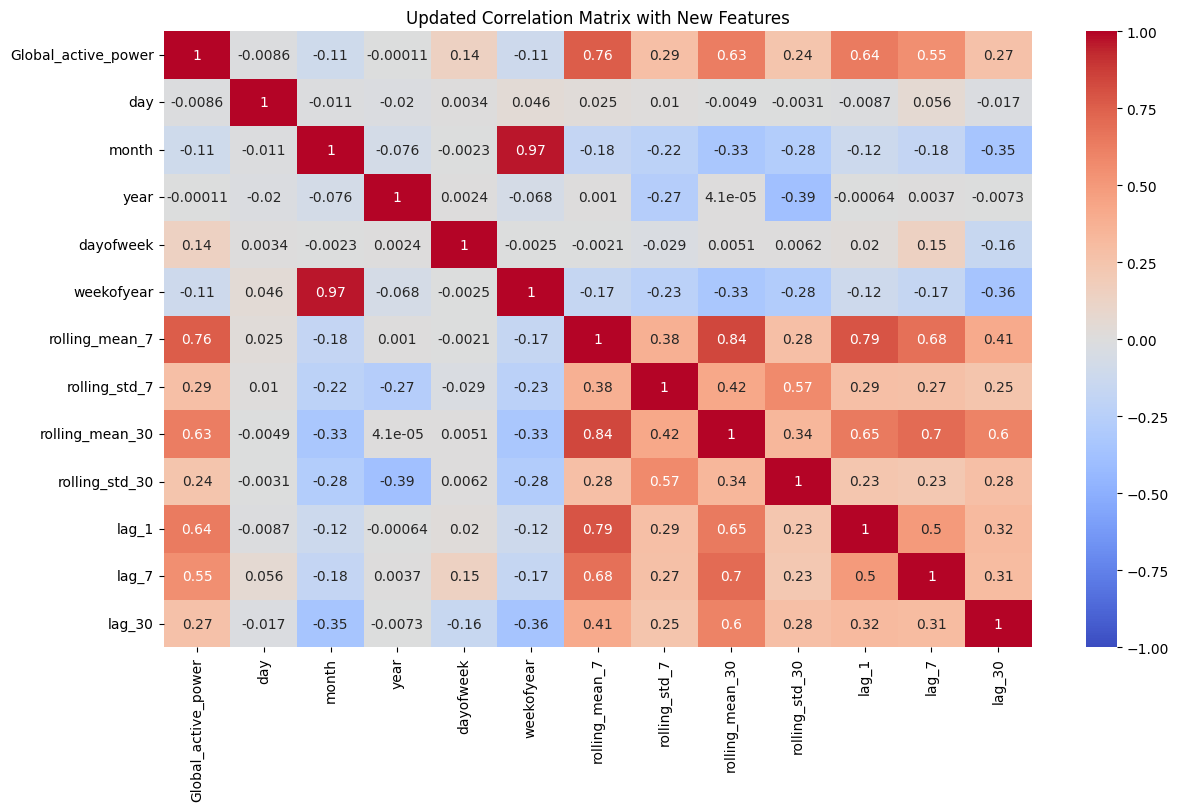

In [19]:
# Plot the updated correlation matrix
plt.figure(figsize=(14, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Updated Correlation Matrix with New Features')
plt.show()

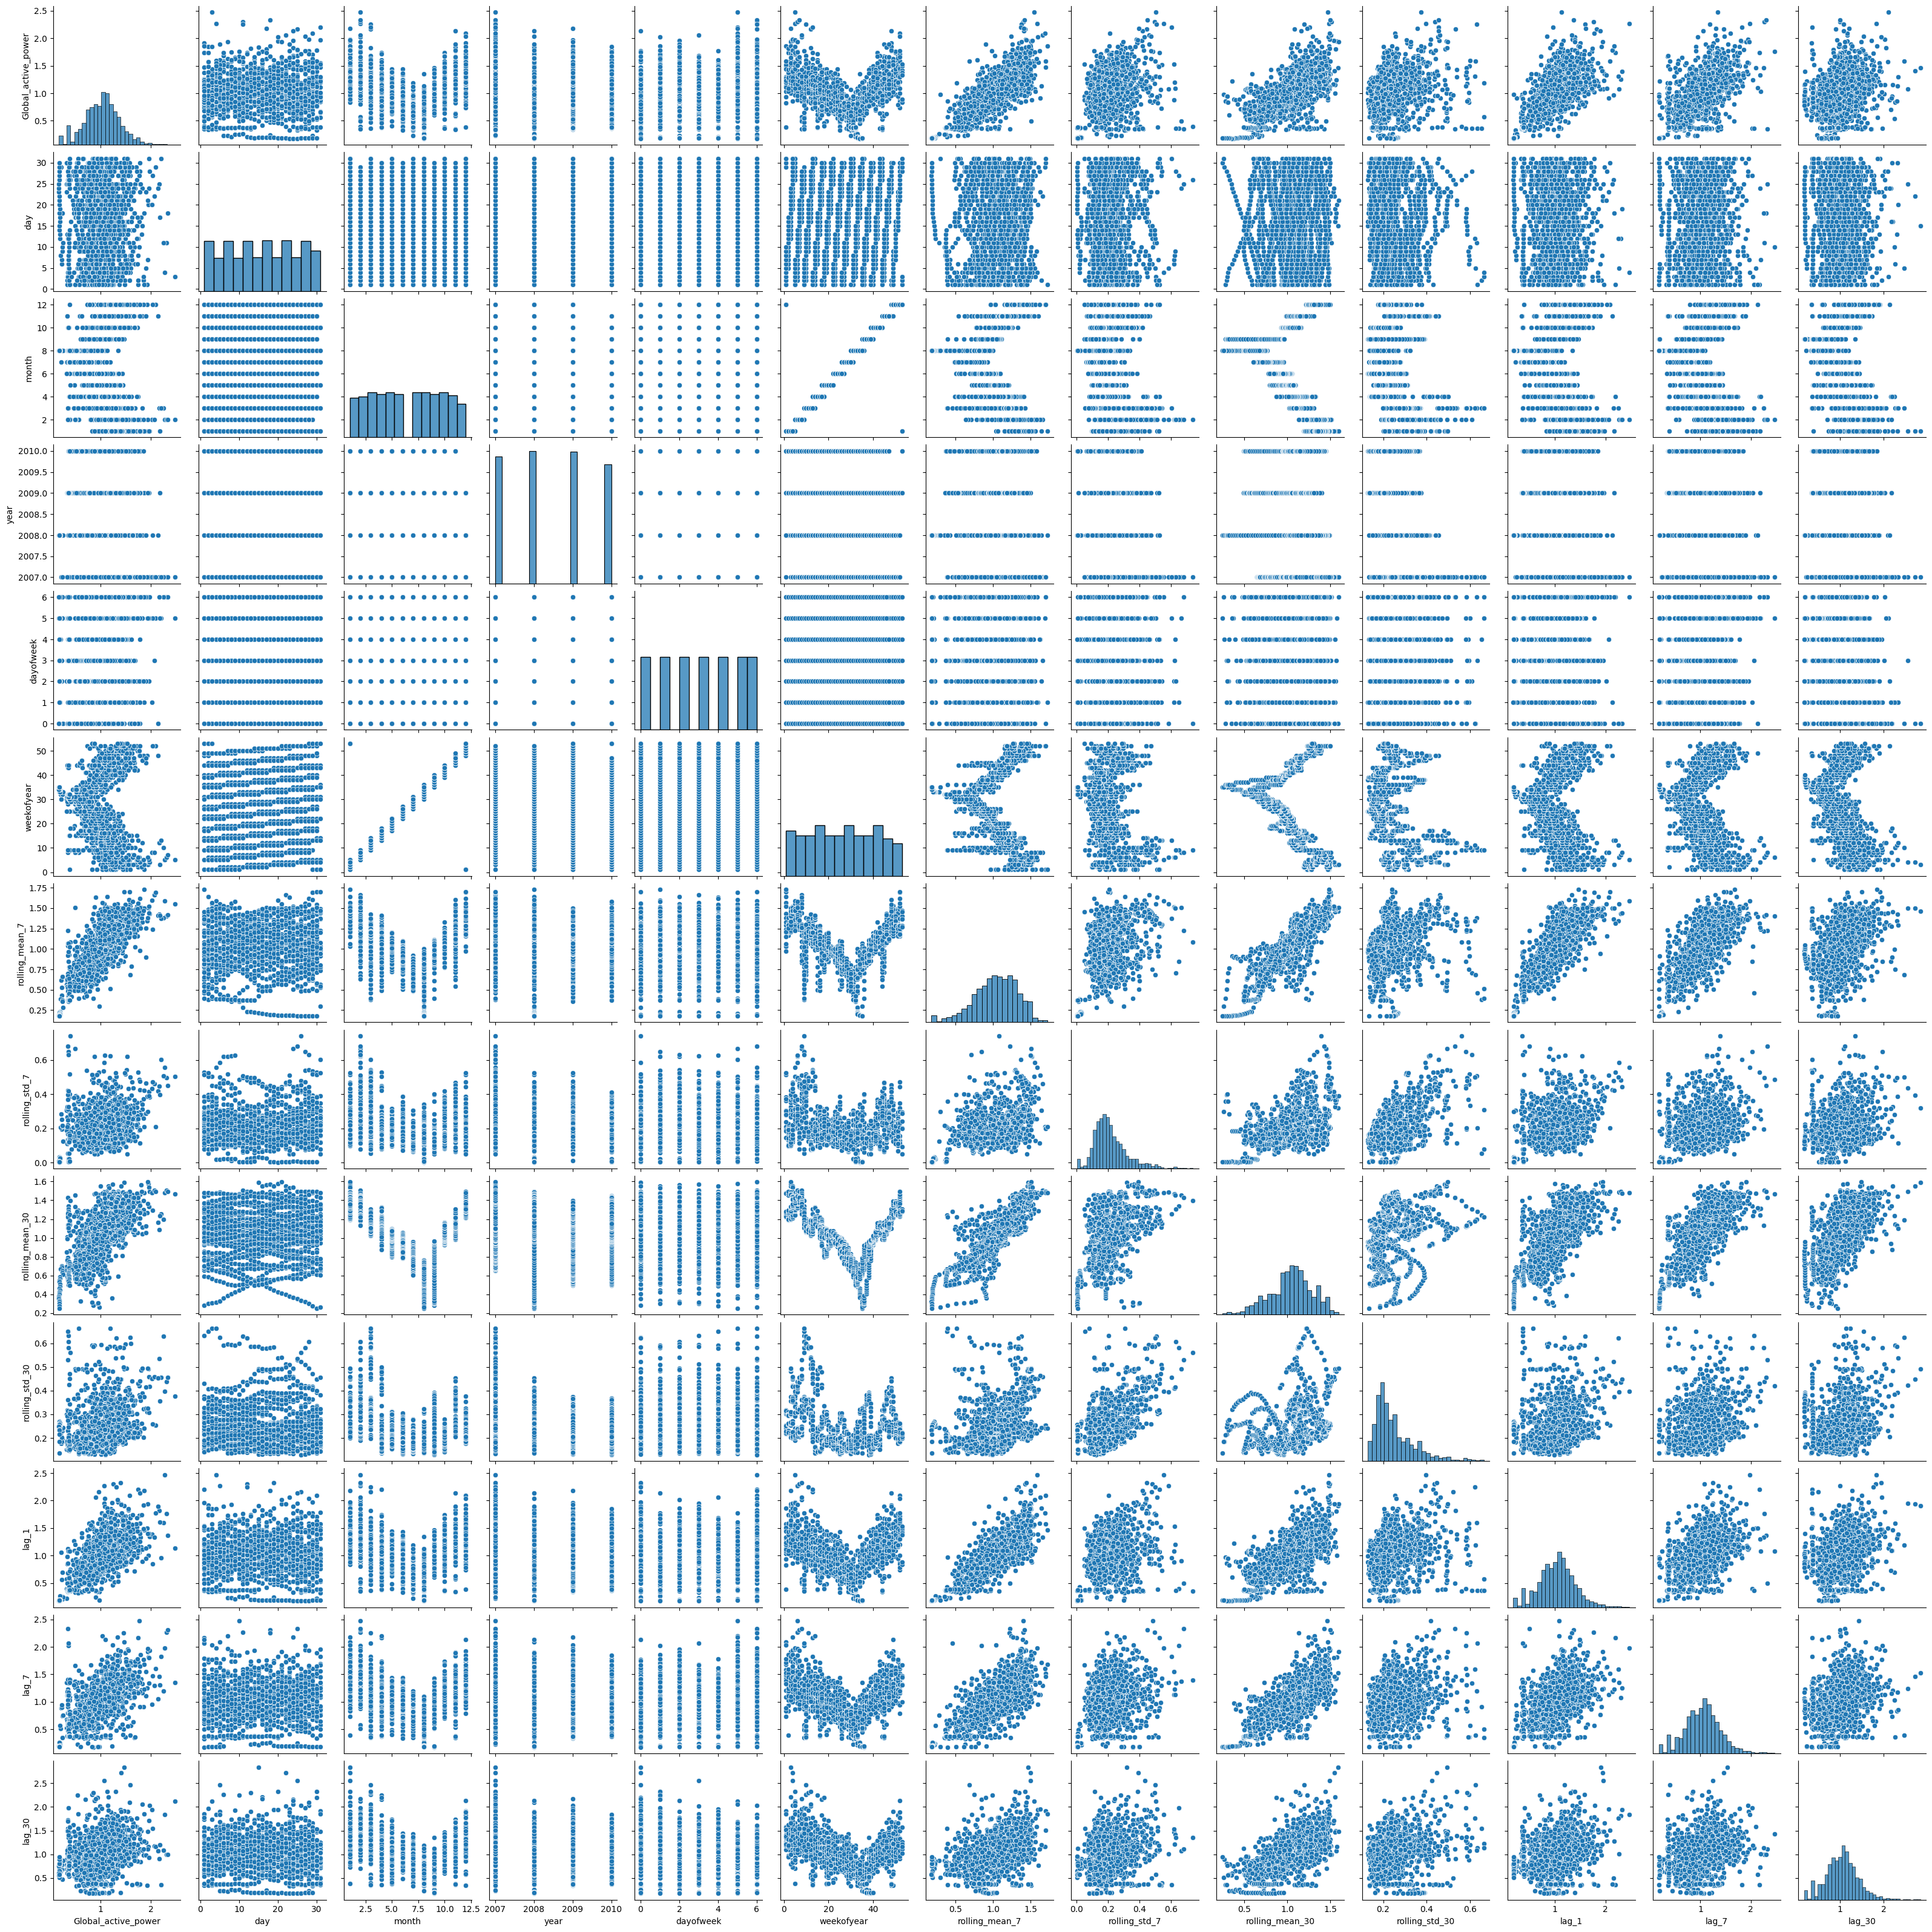

In [20]:
# Pairplot to visualize relationships between different features including new ones
sns.pairplot(data)
plt.show()


#Model Evaluation and Tuning
- Fine-tune model hyperparameters for optimal performance.
- Validate and optimize the model using a separate test dataset.

In [21]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Function to evaluate ARIMA model
def evaluate_arima_model(train, test, arima_order):
    model = ARIMA(train['Global_active_power'], order=arima_order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))
    mse = mean_squared_error(test['Global_active_power'], forecast)
    return mse

# Grid search for ARIMA hyperparameters
p_values = range(0, 5)
d_values = range(0, 2)
q_values = range(0, 5)
best_score, best_cfg = float("inf"), None
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            try:
                mse = evaluate_arima_model(train, test, order)
                if mse < best_score:
                    best_score, best_cfg = mse, order
                print(f'ARIMA{order} MSE={mse}')
            except:
                continue
print(f'Best ARIMA{best_cfg} MSE={best_score}')


ARIMA(0, 0, 0) MSE=0.08146951728229684
ARIMA(0, 0, 1) MSE=0.08148190084030409
ARIMA(0, 0, 2) MSE=0.08137120159504008
ARIMA(0, 0, 3) MSE=0.08141889468505606
ARIMA(0, 0, 4) MSE=0.08132723414809627
ARIMA(0, 1, 0) MSE=0.13535062891939367
ARIMA(0, 1, 1) MSE=0.18051292518704146


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2) MSE=0.20708441369711947
ARIMA(0, 1, 3) MSE=0.19332715592751856
ARIMA(0, 1, 4) MSE=0.19649703983401484
ARIMA(1, 0, 0) MSE=0.08112335108721147
ARIMA(1, 0, 1) MSE=0.08340925314849676
ARIMA(1, 0, 2) MSE=0.08990490045446835
ARIMA(1, 0, 3) MSE=0.08467540263901735
ARIMA(1, 0, 4) MSE=0.08376563949393805
ARIMA(1, 1, 0) MSE=0.15026348315931276
ARIMA(1, 1, 1) MSE=0.20970498339647367
ARIMA(1, 1, 2) MSE=0.19929131769418307
ARIMA(1, 1, 3) MSE=0.19362666617043908
ARIMA(1, 1, 4) MSE=0.1869280747325971
ARIMA(2, 0, 0) MSE=0.08092328735309062


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 0, 1) MSE=0.08954637221310598
ARIMA(2, 0, 2) MSE=0.08733213863691237
ARIMA(2, 0, 3) MSE=0.0845154516599836
ARIMA(2, 0, 4) MSE=0.08310814687287991
ARIMA(2, 1, 0) MSE=0.14328494632264058
ARIMA(2, 1, 1) MSE=0.1784181964689606
ARIMA(2, 1, 2) MSE=0.18487965557357874
ARIMA(2, 1, 3) MSE=0.17011045350148418


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 4) MSE=0.18810965752298478
ARIMA(3, 0, 0) MSE=0.08123596729080947
ARIMA(3, 0, 1) MSE=0.08286927526307132
ARIMA(3, 0, 2) MSE=0.08337274099489651


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 3) MSE=0.08406395089821325


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 4) MSE=0.10143747469805835
ARIMA(3, 1, 0) MSE=0.15743333406494722
ARIMA(3, 1, 1) MSE=0.2176465163759049


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 2) MSE=0.21946736754580454


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 3) MSE=0.20787815042050342


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 4) MSE=0.22228748614247484
ARIMA(4, 0, 0) MSE=0.08157751626312713
ARIMA(4, 0, 1) MSE=0.08146012533171562


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 2) MSE=0.08013433088179023


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 3) MSE=0.16873131857573972


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 4) MSE=0.09361598030196946
ARIMA(4, 1, 0) MSE=0.157681518105475
ARIMA(4, 1, 1) MSE=0.22039263747672724


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 1, 2) MSE=0.22033510335358716


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 3) MSE=0.21984212234735498
ARIMA(4, 1, 4) MSE=0.205321179963386
Best ARIMA(4, 0, 2) MSE=0.08013433088179023


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA Model Mean Squared Error: 0.08013433088179023


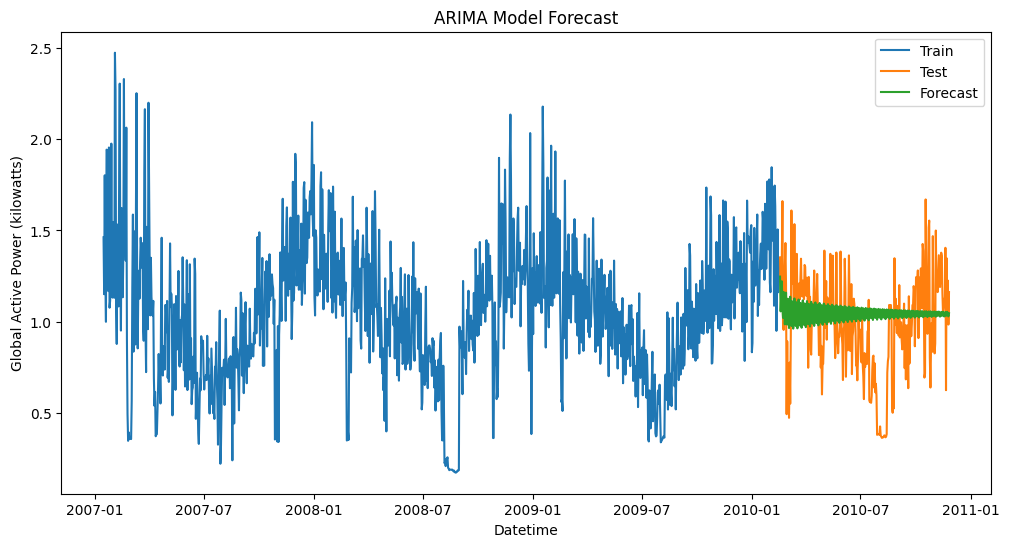

In [22]:
# Fit the best ARIMA model
model = ARIMA(train['Global_active_power'], order=best_cfg)
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Evaluate the model
mse = mean_squared_error(test['Global_active_power'], forecast)
print(f'ARIMA Model Mean Squared Error: {mse}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Global_active_power'], label='Train')
plt.plot(test.index, test['Global_active_power'], label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.title('ARIMA Model Forecast')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power (kilowatts)')
plt.show()


# Future Consumption Prediction:
- Generate forecasts for future electricity consumption based on the trained models.
- Visualize and interpret the predictions to identify potential consumption patterns.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

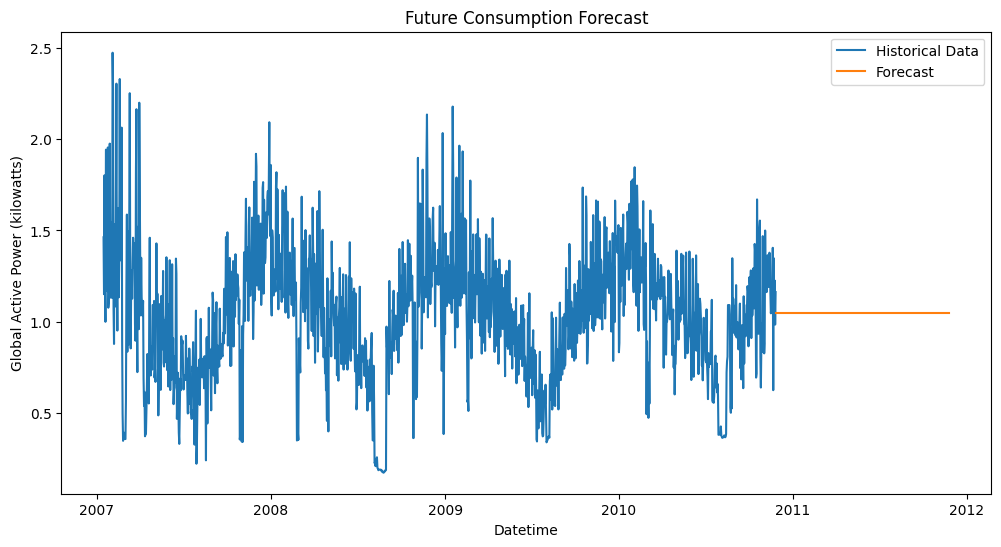

In [23]:
# Extend the dataset with future dates for prediction
future_dates = pd.date_range(start=data.index[-1], periods=365, freq='D')
future_data = pd.DataFrame(index=future_dates, columns=data.columns)
data = pd.concat([data, future_data])

# Refit the model on the entire dataset
model = ARIMA(data['Global_active_power'], order=best_cfg)
model_fit = model.fit()

# Forecast future consumption
forecast = model_fit.forecast(steps=365)

# Plot the future forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Global_active_power'], label='Historical Data')
plt.plot(future_dates, forecast, label='Forecast')
plt.legend()
plt.title('Future Consumption Forecast')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power (kilowatts)')
plt.show()
